#  Practice case - Machine Learning
##  by Aldo Alkautsar

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### import data set

In [2]:
df = pd.read_csv('ML_2_Fellow.csv',encoding='latin1',sep=',')
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.columns

Index(['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


### handling duplicate

In [5]:
#check for duplicate
df.duplicated().any()

True

In [6]:
#drop duplicate
df = df.drop_duplicates()
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [7]:
#because there are duplicate data in some columns even the
duplicate = df[df.duplicated(subset=['Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi','Harga_Satuan', 'Kode_Pelanggan', 'Negara'],keep=False)]
duplicate

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
duplicate.sort_values(['Tanggal_Transaksi','Barang','Kode_Barang'])

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
51762,540678,21667,NaN,-1.0,1/10/2011 16:21,0.00,NaN,United Kingdom
51763,540679,21667,NaN,-1.0,1/10/2011 16:21,0.00,NaN,United Kingdom
57155,541132,22697,GREEN REGENCY TEACUP AND SAUCER,1.0,1/14/2011 10:17,5.79,NaN,United Kingdom
57172,541133,22697,GREEN REGENCY TEACUP AND SAUCER,1.0,1/14/2011 10:17,5.79,NaN,United Kingdom
62541,541506,48185,DOORMAT FAIRY CAKE,1.0,1/18/2011 16:05,16.63,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop_duplicates(subset=['Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi','Harga_Satuan', 'Kode_Pelanggan', 'Negara']).reset_index()
df

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [10]:
# check null
df.isnull().sum()

index                     0
Kode_Bayar                0
Kode_Barang               1
Barang                 1454
Jumlah                    1
Tanggal_Transaksi         1
Harga_Satuan              1
Kode_Pelanggan       132122
Negara                    1
dtype: int64

In [11]:
#check persentage of null
round(df.isnull().sum()/df.shape[0]*100, 2)

index                 0.00
Kode_Bayar            0.00
Kode_Barang           0.00
Barang                0.27
Jumlah                0.00
Tanggal_Transaksi     0.00
Harga_Satuan          0.00
Kode_Pelanggan       24.92
Negara                0.00
dtype: float64

In [12]:
df.sort_values('Barang',ascending=False)

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
111634,114538,546023,85175,wrongly sold sets,-975.0,3/8/2011 17:29,0.0,NaN,United Kingdom
111619,114522,546018,85172,wrongly sold as sets,-600.0,3/8/2011 17:23,0.0,NaN,United Kingdom
114927,117895,546408,22467,wrongly sold (22719) barcode,170.0,3/11/2011 16:25,0.0,NaN,United Kingdom
257646,263884,560039,20713,wrongly marked. 23343 in box,-3100.0,7/14/2011 14:27,0.0,NaN,United Kingdom
446976,456831,575722,85123A,wrongly marked carton 22804,-256.0,11/10/2011 18:20,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
523622,535322,581199,84581,NaN,-2.0,12/7/2011 18:26,0.0,NaN,United Kingdom
523626,535326,581203,23406,NaN,15.0,12/7/2011 18:31,0.0,NaN,United Kingdom
523632,535332,581209,21620,NaN,6.0,12/7/2011 18:35,0.0,NaN,United Kingdom
525264,536981,581234,72817,NaN,27.0,12/8/2011 10:33,0.0,NaN,United Kingdom


### handling null

In [13]:
#seperate null
a = df[df['Jumlah'].isnull()]
a

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
a= a[['Kode_Bayar']]
a

,Kode_Bayar
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/..."


In [15]:
a

,Kode_Bayar
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/..."


In [16]:
a.Kode_Bayar.str.split(',',expand=True,)
#cannot be seperate

,0,1,2,3,4,5,6,7,8
109,536381,82567,"""AIRLINE LOUNGE","METAL SIGN""",2,12/1/2010 9:41,2.1,15311,United Kingdom


In [17]:
#drop null : because of the data is bad
df = df.dropna(subset=['Kode_Barang'])
df

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [18]:
df.isnull().sum()

index                     0
Kode_Bayar                0
Kode_Barang               0
Barang                 1453
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       132121
Negara                    0
dtype: int64

In [19]:
round(df.isnull().sum()/df.shape[0]*100, 2)

index                 0.00
Kode_Bayar            0.00
Kode_Barang           0.00
Barang                0.27
Jumlah                0.00
Tanggal_Transaksi     0.00
Harga_Satuan          0.00
Kode_Pelanggan       24.92
Negara                0.00
dtype: float64

C:\Users\Aldo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kode_Pelanggan', ylabel='Density'>

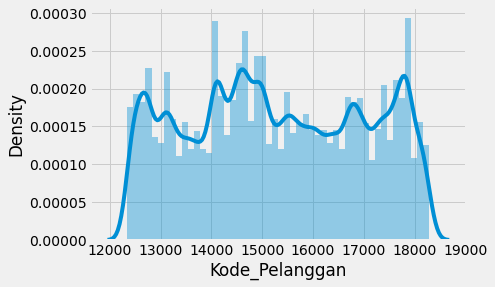

In [20]:
sns.distplot(df['Kode_Pelanggan'])

C:\Users\Aldo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Jumlah'>

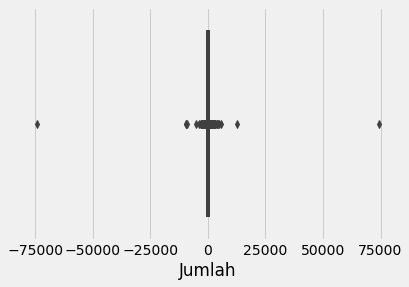

In [21]:
sns.boxplot(df['Jumlah'])

In [22]:
#replace nun value with mode, because Kode_Pelanggan and Barang is unique and string

In [23]:
df['Kode_Pelanggan'].mode()

0    17841.0
dtype: float64

In [24]:
df['Barang'].mode()[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [25]:
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].fillna(df['Kode_Pelanggan'].mode()[0])
df['Barang'] = df['Barang'].fillna(df['Barang'].mode()[0])

<ipython-input-25-4a0bb83a08f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kode_Pelanggan'] = df['Kode_Pelanggan'].fillna(df['Kode_Pelanggan'].mode()[0])
<ipython-input-25-4a0bb83a08f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Barang'] = df['Barang'].fillna(df['Barang'].mode()[0])


In [26]:
df.isnull().sum()

index                0
Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

In [27]:
df

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [28]:
#delete harga_satuan == 0. because it is error, how could be the harga_satuan is zero

In [29]:
df = df[df.Harga_Satuan != 0]
df

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [30]:
df.loc[(df['Jumlah'] < 0)]

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
528651,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12/9/2011 9:57,0.83,14397.0,United Kingdom
529728,541541,C581499,M,Manual,-1.0,12/9/2011 10:28,224.69,15498.0,United Kingdom
529892,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
529893,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [31]:
df['Jumlah'] = abs(df['Jumlah'])
df['Harga_Satuan'] = abs(df['Harga_Satuan'])

<ipython-input-31-02b0a17fd2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jumlah'] = abs(df['Jumlah'])
<ipython-input-31-02b0a17fd2f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Harga_Satuan'] = abs(df['Harga_Satuan'])


In [32]:
df.loc[(df['Jumlah'] < 0)]

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


### No 1

In [33]:
df_item = df
df_item

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [34]:
df_item['harga']=df_item['Jumlah']*df_item['Harga_Satuan']

<ipython-input-34-f0ba5e2e1095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item['harga']=df_item['Jumlah']*df_item['Harga_Satuan']


In [35]:
df_item

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,harga
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France,10.20
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France,12.60
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60


In [36]:
df_item.sort_values('Jumlah',ascending=False).head(10)

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,harga
59952,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,1/18/2011 10:17,1.04,12346.0,United Kingdom,77183.60
59947,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.60
4159,4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360.0,12/2/2010 14:23,0.03,15838.0,United Kingdom,280.80
412520,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0,10/27/2011 12:26,0.21,12901.0,United Kingdom,1008.00
201155,206121,554868,22197,SMALL POPCORN HOLDER,4300.0,5/27/2011 10:52,0.72,13135.0,United Kingdom,3096.00
94892,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906.0,2/22/2011 10:43,0.82,18087.0,United Kingdom,3202.92
264520,270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186.0,7/19/2011 17:04,0.06,14609.0,United Kingdom,191.16
156146,160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.0,4/18/2011 13:08,2.10,15749.0,United Kingdom,6539.40
51285,52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.0,1/11/2011 12:55,2.10,15749.0,United Kingdom,6539.40
156533,160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.0,4/18/2011 13:20,2.10,15749.0,United Kingdom,6539.40


In [108]:
df_item.sort_values(['Jumlah','Harga_Satuan']).head(10)

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,harga
153297,157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1.0,4/15/2011 9:27,0.001,13952.0,United Kingdom,0.001
272519,279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1.0,7/26/2011 10:13,0.001,15618.0,United Kingdom,0.001
352019,359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1.0,9/25/2011 14:58,0.001,16198.0,United Kingdom,0.001
353843,361741,568375,BANK CHARGES,Bank Charges,1.0,9/26/2011 17:01,0.001,13405.0,United Kingdom,0.001
414836,423991,573174,16218,CARTOON PENCIL SHARPENERS,1.0,10/28/2011 10:25,0.060,17841.0,United Kingdom,0.060
489443,500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1.0,11/25/2011 11:41,0.060,12748.0,United Kingdom,0.060
278454,285080,561894,M,Manual,1.0,7/31/2011 15:00,0.080,14456.0,United Kingdom,0.080
235579,241349,558198,17038,PORCELAIN BUDAH INCENSE HOLDER,1.0,6/27/2011 12:49,0.100,14104.0,United Kingdom,0.100
250948,257038,559509,17038,PORCELAIN BUDAH INCENSE HOLDER,1.0,7/8/2011 15:25,0.100,15920.0,United Kingdom,0.100
487010,497822,578479,17038,PORCELAIN BUDAH INCENSE HOLDER,1.0,11/24/2011 12:48,0.100,15858.0,United Kingdom,0.100


### No 2

In [38]:
df.sort_values(['Jumlah']).head(20)

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,harga
119290,122386,546866,22189,CREAM HEART CARD HOLDER,1.0,3/17/2011 15:47,3.95,14462.0,United Kingdom,3.95
456908,467007,576339,21890,S/6 WOODEN SKITTLES IN COTTON BAG,1.0,11/14/2011 15:27,5.79,14096.0,United Kingdom,5.79
278686,285317,561900,22517,CHILDS GARDEN RAKE PINK,1.0,7/31/2011 15:31,2.10,16655.0,United Kingdom,2.10
456905,467004,576339,21877,HOME SWEET HOME MUG,1.0,11/14/2011 15:27,3.29,14096.0,United Kingdom,3.29
456904,467003,576339,21876,POTTERING MUG,1.0,11/14/2011 15:27,3.29,14096.0,United Kingdom,3.29
278685,285316,561900,22514,CHILDS GARDEN SPADE BLUE,1.0,7/31/2011 15:31,2.10,16655.0,United Kingdom,2.10
456903,467002,576339,21875,KINGS CHOICE MUG,1.0,11/14/2011 15:27,3.29,14096.0,United Kingdom,3.29
370426,378626,C569655,47566,PARTY BUNTING,1.0,10/5/2011 12:58,4.95,14534.0,United Kingdom,4.95
278662,285290,561900,22181,SNOWSTORM PHOTO FRAME FRIDGE MAGNET,1.0,7/31/2011 15:31,0.85,16655.0,United Kingdom,0.85
456900,466999,576339,21866,UNION JACK FLAG LUGGAGE TAG,1.0,11/14/2011 15:27,2.46,14096.0,United Kingdom,2.46


In [105]:
a = df.groupby('Kode_Pelanggan').agg({"Negara":"unique"}).reset_index()
a

,Kode_Pelanggan,Negara
0,12346.0,[United Kingdom]
1,12347.0,[Iceland]
2,12348.0,[Finland]
3,12349.0,[Italy]
4,12350.0,[Norway]
...,...,...
4364,18280.0,[United Kingdom]
4365,18281.0,[United Kingdom]
4366,18282.0,[United Kingdom]
4367,18283.0,[United Kingdom]


In [106]:
a['Negara'].value_counts()


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[United Kingdom]                                                                                  3946
[Germany]                                                                                           95
[France]                                                                                            87
[Spain]                                                                                             29
[Belgium]                                                                                           22
[Switzerland]                                                                                       19
[Portugal]                                                                                          19
[Italy]                                                                                             15
[Finland]                                                                                           12
[Norway]                                                                 

### No 3

In [39]:
df

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,harga
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
530080,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France,10.20
530081,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France,12.60
530082,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60
530083,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60


In [40]:
df['Negara'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [41]:
df.columns

Index(['index', 'Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah',
       'Tanggal_Transaksi', 'Harga_Satuan', 'Kode_Pelanggan', 'Negara',
       'harga'],
      dtype='object')

In [42]:
df['Tanggal_Transaksi'].min()

'1/10/2011 10:07'

In [43]:
df['Tanggal_Transaksi'].max()

'9/9/2011 9:52'

In [88]:
clustering = df[['Jumlah','Kode_Barang','Kode_Pelanggan','harga']]

In [89]:
clustering

,Jumlah,Kode_Barang,Kode_Pelanggan,harga
0,6.0,85123A,17850.0,15.30
1,6.0,71053,17850.0,20.34
2,8.0,84406B,17850.0,22.00
3,6.0,84029G,17850.0,20.34
4,6.0,84029E,17850.0,20.34
...,...,...,...,...
530080,12.0,22613,12680.0,10.20
530081,6.0,22899,12680.0,12.60
530082,4.0,23254,12680.0,16.60
530083,4.0,23255,12680.0,16.60


In [90]:
clustering =clustering.groupby(['Kode_Pelanggan']).agg({"Jumlah":"sum","harga":"sum","Kode_Barang":"nunique"}).reset_index()
clustering

,Kode_Pelanggan,Jumlah,harga,Kode_Barang
0,12346.0,148430.0,154367.20,1
1,12347.0,2446.0,4299.80,102
2,12348.0,2341.0,1797.24,22
3,12349.0,631.0,1757.55,73
4,12350.0,197.0,334.40,17
...,...,...,...,...
4364,18280.0,45.0,180.60,10
4365,18281.0,54.0,80.82,7
4366,18282.0,108.0,179.50,12
4367,18283.0,1357.0,2045.53,263


In [91]:
from sklearn.preprocessing import minmax_scale

clustering[['Jumlah','harga']] = minmax_scale(clustering[['Jumlah','harga']])

In [92]:
clustering

,Kode_Pelanggan,Jumlah,harga,Kode_Barang
0,12346.0,0.337484,0.074027,1
1,12347.0,0.005559,0.002061,102
2,12348.0,0.005320,0.000861,22
3,12349.0,0.001432,0.000842,73
4,12350.0,0.000446,0.000160,17
...,...,...,...,...
4364,18280.0,0.000100,0.000086,10
4365,18281.0,0.000121,0.000038,7
4366,18282.0,0.000243,0.000085,12
4367,18283.0,0.003083,0.000980,263


In [93]:
clustering = clustering.drop(columns='Kode_Pelanggan')
clustering

,Jumlah,harga,Kode_Barang
0,0.337484,0.074027,1
1,0.005559,0.002061,102
2,0.005320,0.000861,22
3,0.001432,0.000842,73
4,0.000446,0.000160,17
...,...,...,...
4364,0.000100,0.000086,10
4365,0.000121,0.000038,7
4366,0.000243,0.000085,12
4367,0.003083,0.000980,263


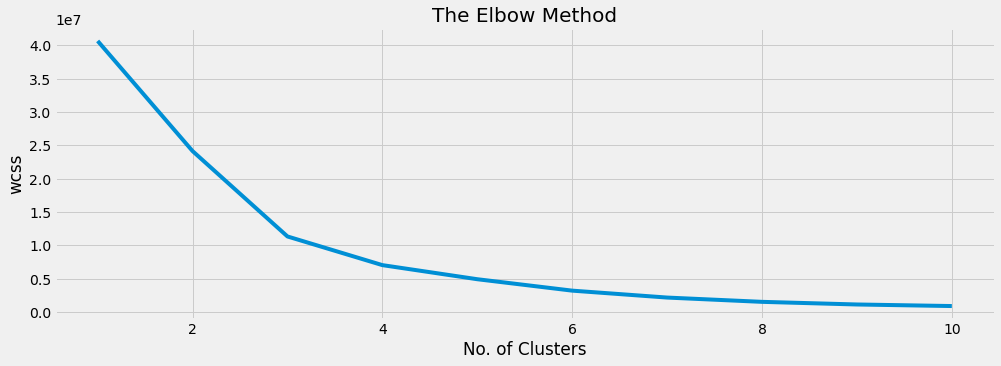

In [94]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    km.fit(clustering)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [113]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)
cluster = km.fit_predict(clustering)

In [114]:
clustering['cluster']=cluster
clustering

,Jumlah,harga,Kode_Barang,cluster
0,0.337484,0.074027,1,0
1,0.005559,0.002061,102,3
2,0.005320,0.000861,22,0
3,0.001432,0.000842,73,3
4,0.000446,0.000160,17,0
...,...,...,...,...
4364,0.000100,0.000086,10,0
4365,0.000121,0.000038,7,0
4366,0.000243,0.000085,12,0
4367,0.003083,0.000980,263,1


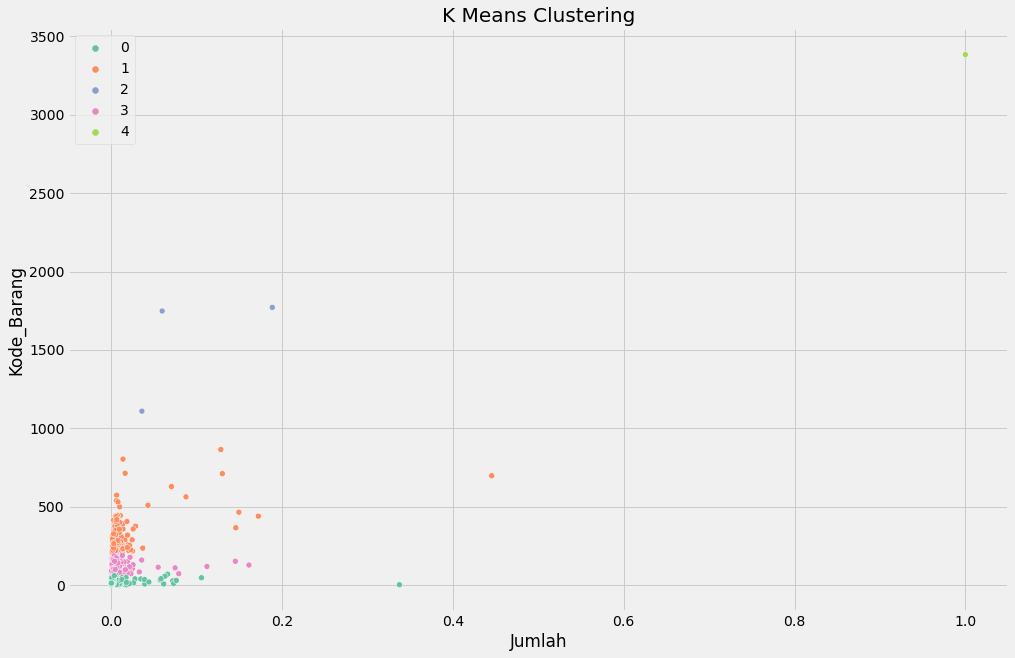

In [115]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=clustering['Jumlah'],y=clustering['Kode_Barang'], hue=clustering["cluster"],palette='Set2')
plt.title('K Means Clustering', fontsize = 20)
plt.legend()
plt.show()

In [116]:
hasil1=clustering.groupby(['cluster']).agg({"Jumlah":"mean","harga":"mean","Kode_Barang":"mean"}).reset_index()
hasil1

,cluster,Jumlah,harga,Kode_Barang
0,0,0.001430,0.000513,26.800126
1,1,0.014092,0.004848,299.482759
2,2,0.094752,0.042254,1542.666667
3,3,0.004140,0.001622,114.591919
4,4,1.000000,1.000000,3384.000000
